In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 次のサンプル画像を利用する．「HighwayI_000000.png」を読み込み，画像を表示するプログラムを作成せよ．

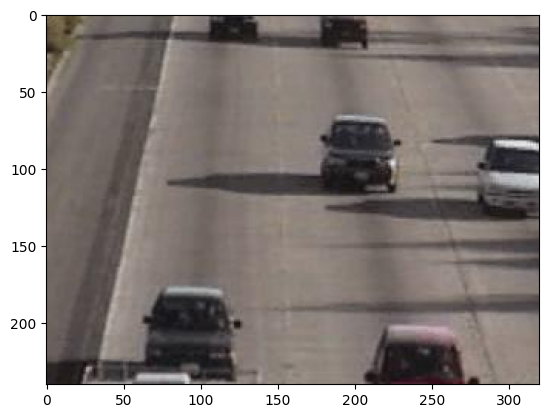

In [3]:
# 画像ファイルの読み込み
image = cv2.imread("HighwayI/HighwayI_000000.png")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

# 「HighwayI_000000.png」から，左上の座標が(60, 170)で，幅70ピクセル，高さ70ピクセルの範囲を抽出し，「template.png」として保存するプログラムを作成せよ．

(70, 70, 3)


True

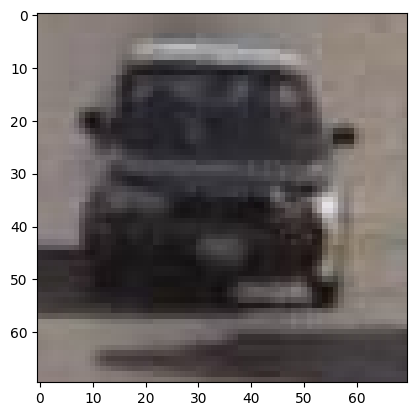

In [4]:
template_rgb = image_rgb[60:130, 170:240]

print(template_rgb.shape)

# 画像の表示
plt.imshow(template_rgb)

# RGBからBGRに変換
template_bgr = cv2.cvtColor(template_rgb, cv2.COLOR_BGR2RGB)

cv2.imwrite("template.png", template_bgr)

# 「HighwayI_000000.png」を入力画像，「template.png」をテンプレートとして使用して，テンプレートマッチングを適用しなさい．評価指標は平方差（cv2.TM_SQDIFF）を使用すること．最も一致する位置を画像として表示するプログラムを作成せよ．

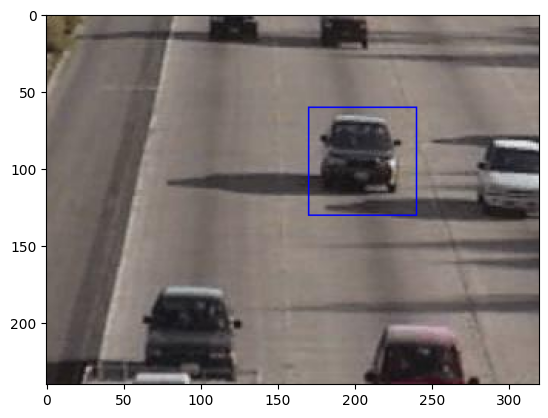

In [6]:
# 画像ファイルの読み込み
image = cv2.imread("HighwayI/HighwayI_000000.png")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像ファイルの読み込み
template = cv2.imread("template.png")

# BGRからRGBに変換
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

# 画像とテンプレートのサイズを取得
image_height, image_width, _ = image_rgb.shape
template_height, template_width, _ = template_rgb.shape

# テンプレートマッチングを実行（平方差）
result = cv2.matchTemplate(image_rgb, template_rgb, cv2.TM_SQDIFF)

# 最小のスコアとその位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# 最も一致する位置（最小のMSEスコアの位置）
best_x, best_y = min_loc

# 結果の確認のため、最も一致する位置に矩形を描画
result_image = image_rgb.copy()
cv2.rectangle(result_image, (best_x, best_y), (best_x + template_width, best_y + template_height), (0, 0, 255))

# 結果を表示
plt.imshow(result_image)

# 問題3のテンプレートマッチングにおいて，評価指標として正規化した互相関（cv2.TM_CCORR_NORMED）使用し，最も一致する位置を画像として表示するプログラムを作成せよ．

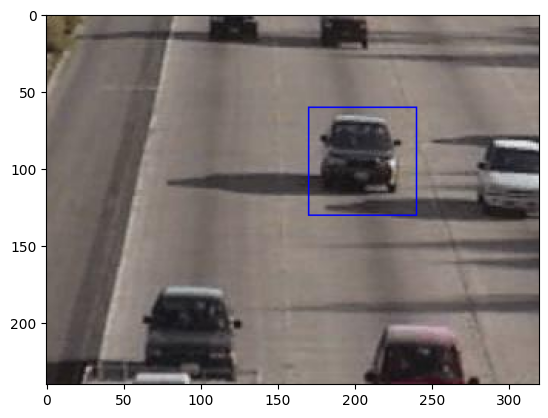

In [7]:
# 画像ファイルの読み込み
image = cv2.imread("HighwayI/HighwayI_000000.png")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像ファイルの読み込み
template = cv2.imread("template.png")

# BGRからRGBに変換
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

# 画像とテンプレートのサイズを取得
image_height, image_width, _ = image_rgb.shape
template_height, template_width, _ = template_rgb.shape

# テンプレートマッチングを実行（平方差）
result = cv2.matchTemplate(image_rgb, template_rgb, cv2.TM_CCORR_NORMED)

# 最小のスコアとその位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# 最も一致する位置（最小のMSEスコアの位置）
best_x, best_y = max_loc

# 結果の確認のため、最も一致する位置に矩形を描画
result_image = image_rgb.copy()
cv2.rectangle(result_image, (best_x, best_y), (best_x + template_width, best_y + template_height), (0, 0, 255))

# 結果を表示
plt.imshow(result_image)

# 「HighwayI_000000.png」と背景画像「GT_HighwayI.png」を読み込み，背景差分を計算し，差分画像のマスクを表示するプログラムを作成せよ．閾値は適切に設定すること．

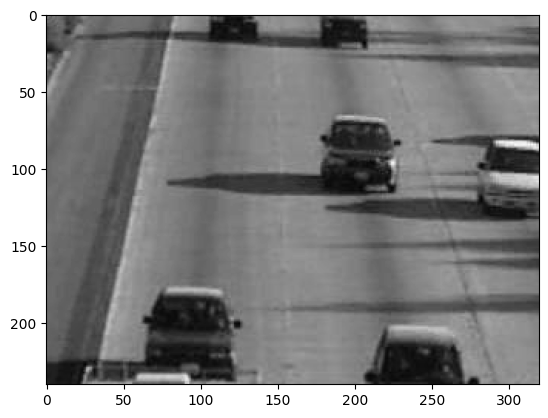

In [8]:
# 画像を読み込み
image = cv2.imread("HighwayI/HighwayI_000000.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

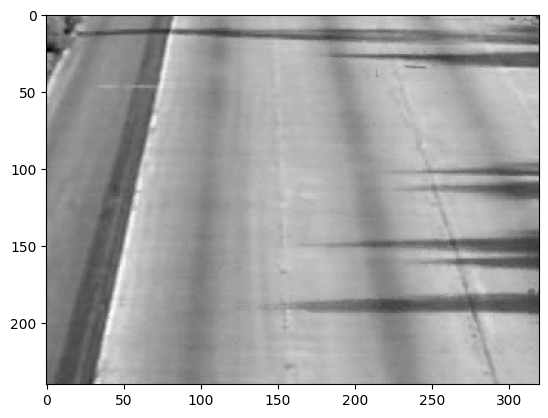

In [10]:
# 背景画像を読み込み
background = cv2.imread("GT_HighwayI.png")
background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
plt.imshow(background_gray, cmap="gray")

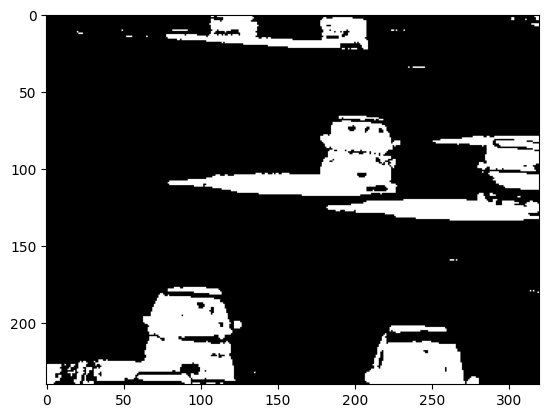

In [29]:
# 背景差分の取得
diff_image = cv2.absdiff(image_gray, background_gray)

# 背景差分を閾値で2値化
threshold = 40
_, foreground_mask = cv2.threshold(diff_image, threshold, 255, cv2.THRESH_BINARY)

# 結果を表示
plt.imshow(foreground_mask, cmap="gray")

# 問題5で得られた差分マスクに対して，クロージング演算を適用して，結果を表示するプログラムを作成せよ．カーネルのサイズは適切に設定すること．

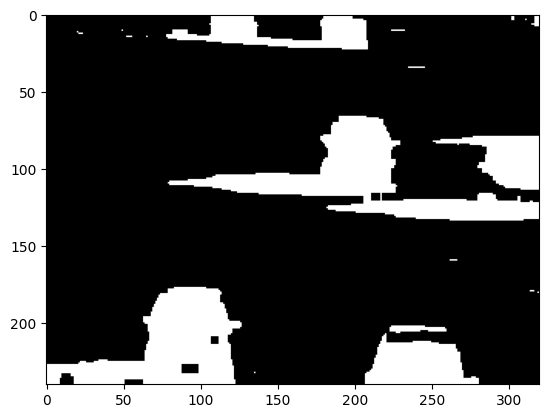

In [30]:
# カーネルの作成
kernel = np.ones((3, 3), np.uint8)  

# クロージング（エロージョン + ダイレーション）
foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# 結果を表示
plt.imshow(foreground_mask, cmap="gray")

# 問題6で得られた差分マスクに対して，オープニング演算を適用して，結果を表示するプログラムを作成せよ．カーネルのサイズは適切に設定すること．

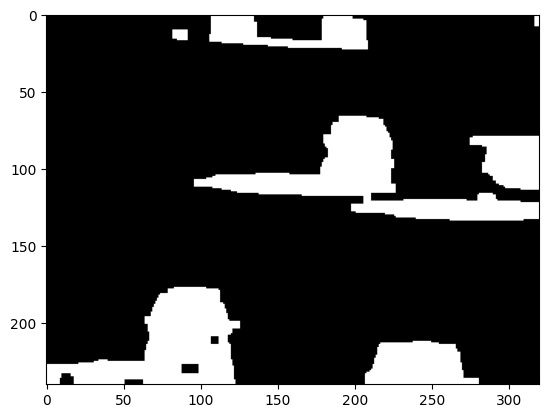

In [31]:
# カーネルの作成
kernel = np.ones((3, 3), np.uint8)  

# オープニング（ダイレーション + エロージョン）
foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_OPEN, kernel, iterations=2)

# 結果を表示
plt.imshow(foreground_mask, cmap="gray")

# 問題7で得られた差分マスクを利用して，「HighwayI_000000.png」から前景画像を抽出して表示するプログラムを作成せよ．

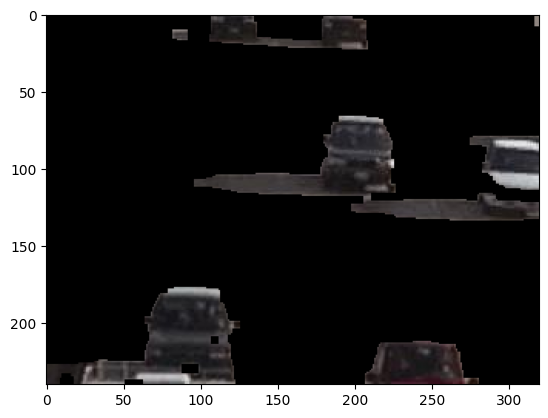

In [34]:
# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 元の画像とマスクを利用して前景のみを抽出
foreground = cv2.bitwise_and(image_rgb, image_rgb, mask=foreground_mask)

# 結果を表示
plt.imshow(foreground)